# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
not_craig_wright = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [12]:
# Fetch current BTC price
bitcoin_request = requests.get(btc_url).json()
bitcoin_price = bitcoin_request['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
ethereum_request = requests.get(eth_url).json()
ethereum_price = ethereum_request['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = bitcoin_price * not_craig_wright
my_eth_value = ethereum_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {not_craig_wright} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13639.93
The current value of your 5.3 ETH is $1953.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-15").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Preview DataFrame
df_closing_prices

AGG                                         \
                             open      high       low    close    volume   
2020-05-28 00:00:00-04:00  117.14  117.3500  112.2400  117.330  18488400   
2020-05-29 00:00:00-04:00  117.43  117.7100  117.3200  117.670  16292692   
2020-06-01 00:00:00-04:00  117.35  117.3999  117.2400  117.365  10635820   
2020-06-02 00:00:00-04:00  117.38  117.4700  117.3100  117.450   7837090   
2020-06-03 00:00:00-04:00  117.26  117.4100  117.0600  117.160  11554888   
...                           ...       ...       ...      ...       ...   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930   2770157   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010   3250338   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.040   3295967   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.9600  117.970   4988612   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.8800  117.880   3589312   

                              SPY                                         
                             open      high     low     close     volume  
2020-05-28 00:00:00-04:00  304.65  306.8400  302.24  302.9600   80456712  
2020-05-29 00:00:00-04:00  302.46  304.9600  299.47  304.1600  101356845  
2020-06-01 00:00:00-04:00  303.62  306.2050  303.06  305.5800   46186733  
2020-06-02 00:00:00-04:00  306.55  308.1300  305.10  308.1300   66042497  
2020-06-03 00:00:00-04:00  310.24  313.2200  309.94  312.2117   79223813  
...                           ...       ...     ...       ...        ...  
2020-10-12 00:00:00-04:00  349.59  354.0200  349.06  352.4300   61163344  
2020-10-13 00:00:00-04:00  352.28  352.4651  349.09  350.1500   62272512  
2020-10-14 00:00:00-04:00  350.75  351.9300  347.14  347.9700   47281475  
2020-10-15 00:00:00-04:00  343.71  348.0200  343.13  347.5100   50665477  
2020-10-16 00:00:00-04:00  348.96  350.7500  347.10  347.2500   62467863  

[100 rows x 10 columns]

In [18]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices['AGG']['close']
spy_close_price = df_closing_prices['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2020-05-28 00:00:00-04:00    117.330
2020-05-29 00:00:00-04:00    117.670
2020-06-01 00:00:00-04:00    117.365
2020-06-02 00:00:00-04:00    117.450
2020-06-03 00:00:00-04:00    117.160
                              ...   
2020-10-12 00:00:00-04:00    117.930
2020-10-13 00:00:00-04:00    118.010
2020-10-14 00:00:00-04:00    118.040
2020-10-15 00:00:00-04:00    117.970
2020-10-16 00:00:00-04:00    117.880
Name: close, Length: 100, dtype: float64
Current SPY closing price: $2020-05-28 00:00:00-04:00    302.9600
2020-05-29 00:00:00-04:00    304.1600
2020-06-01 00:00:00-04:00    305.5800
2020-06-02 00:00:00-04:00    308.1300
2020-06-03 00:00:00-04:00    312.2117
                               ...   
2020-10-12 00:00:00-04:00    352.4300
2020-10-13 00:00:00-04:00    350.1500
2020-10-14 00:00:00-04:00    347.9700
2020-10-15 00:00:00-04:00    347.5100
2020-10-16 00:00:00-04:00    347.2500
Name: close, Length: 100, dtype: float64


In [19]:
# Compute the current value of shares
my_agg_value = agg_close_price[-1] * my_agg
my_spy_value = spy_close_price[-1] * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_household_income = 12000


# Create savings DataFrame
cryptocurrency_savings = my_btc_value + my_eth_value
share_savings = my_spy_value + my_agg_value
df_savings = pd.DataFrame([cryptocurrency_savings, share_savings], index = ['Cryptocurrency', 'Shares'])
df_savings.columns = ['Amount']


# Display savings DataFrame
display(df_savings)

,Amount
Cryptocurrency,15593.671
Shares,40938.500


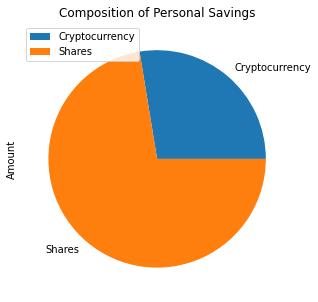

In [31]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Amount', title = 'Composition of Personal Savings',figsize=(5, 5))


In [35]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
elif total_savings < emergency_fund:
    print(f'You\'re ${emergency_fund - total_savings} to reaching your goal.')
else:
    print(f'You done did it! Now head off to Vegas and put it all on red')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sims = 500
monte_carlo_train_years = 30
portfolio_weight = [.60, .40]

monte_carlo_forecast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_weight,
    num_simulation = monte_carlo_sims,
    num_trading_days = 252 * monte_carlo_train_years
)

In [47]:
# Printing the simulation input data
monte_carlo_forecast.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005210,0.997813,1.000228,0.995495,0.992612,0.990958,1.001806,1.001797,1.002060,1.001282,...,1.009447,0.997020,1.007225,1.003474,0.997092,0.994708,1.003966,1.006817,0.995541,1.001245
2,1.015427,0.990778,0.999910,0.992660,0.994784,0.983853,1.006125,0.996538,1.002594,1.008817,...,1.007941,0.991117,1.013313,1.007164,1.003280,0.999793,1.006546,1.012462,0.999998,1.008288
3,1.017941,1.001175,0.997450,0.995657,0.987605,0.992354,1.013962,0.997465,0.999767,1.010932,...,1.006503,1.006631,1.014538,1.010912,0.998251,0.992143,1.003283,1.017390,0.994990,0.998104
4,1.018672,0.996279,1.000175,0.993314,0.982861,0.989980,1.021943,0.992075,0.995595,1.014012,...,1.001654,1.005596,1.011137,1.012482,0.996366,0.994085,0.996717,1.021637,0.998527,0.995315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.849636,7.051618,3.797724,6.683338,2.807859,12.693463,5.538575,2.648589,3.845951,6.243844,...,4.431875,7.842937,3.182260,4.923847,7.355917,8.791490,9.383655,7.027299,4.767431,6.917922
7557,2.838557,7.027599,3.798096,6.648811,2.812612,12.839743,5.492539,2.658126,3.831303,6.226115,...,4.403131,7.844844,3.193353,4.922350,7.272635,8.815634,9.423772,6.967377,4.729958,6.880330
7558,2.833965,7.003340,3.822428,6.710110,2.801378,12.854815,5.521300,2.643574,3.856041,6.235298,...,4.402105,7.815860,3.191029,4.925593,7.297940,8.822256,9.429184,6.893782,4.719380,6.878915
7559,2.837209,6.989716,3.805343,6.670568,2.825661,12.794124,5.532276,2.606732,3.863194,6.238731,...,4.393301,7.830524,3.204036,4.940495,7.292710,8.802986,9.356429,6.878087,4.696180,6.842897


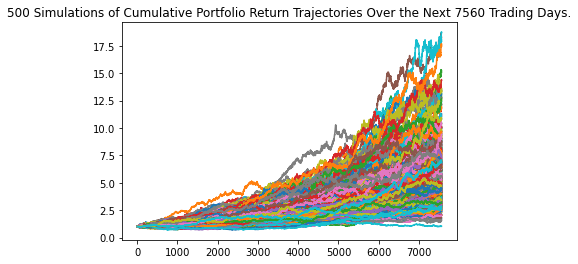

In [50]:
# Plot simulation outcomes
simulation_plot_outcome = monte_carlo_forecast.plot_simulation()

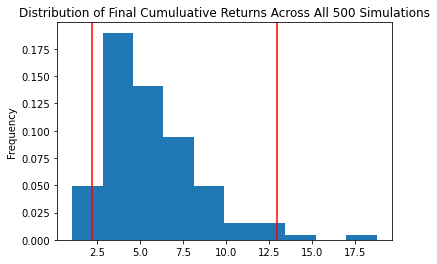

In [51]:
# Plot probability distribution and confidence intervals
distribution_plot = monte_carlo_forecast.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
monte_carlo_sim_results = monte_carlo_forecast.summarize_cumulative_return()

# Print summary statistics
print(monte_carlo_sim_results)

count           500.000000
mean              5.667601
std               2.756003
min               1.040240
25%               3.652744
50%               4.952879
75%               6.903273
max              18.738192
95% CI Lower      2.205866
95% CI Upper     12.931535
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(monte_carlo_sim_results[8]*initial_investment, 2)
ci_lower = round(monte_carlo_sim_results[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $258630.7 and $44117.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [54]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(monte_carlo_sim_results[8]*initial_investment, 2)
ci_lower = round(monte_carlo_sim_results[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $387946.04 and $66175.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_train_years = 5
monte_carlo_sims = 500

monte_carlo_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = monte_carlo_sims,
    num_trading_days = 252 * monte_carlo_train_years
) 

In [58]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992622,0.995141,1.004350,0.983874,1.014481,0.994729,1.010656,1.009838,0.998101,1.005719,...,1.004928,0.993912,1.002881,1.002237,0.984507,1.004115,1.008772,1.000307,1.006668,0.995439
2,0.987646,0.999294,1.014229,0.982811,1.011786,0.986626,1.018280,1.003696,1.002352,0.994444,...,0.996861,1.003524,1.006879,0.995827,0.986614,1.003012,1.003038,1.008392,1.005585,0.987156
3,0.982592,0.995581,1.015722,0.979587,1.004514,0.993205,1.018762,1.016428,0.999558,0.994998,...,0.984950,1.004634,1.011802,0.987595,0.985040,1.007796,1.006831,1.014204,1.002367,0.988076
4,0.984437,1.003137,1.008322,0.959868,0.993843,0.989955,1.027242,1.014877,1.001171,0.994565,...,0.992452,1.010618,1.011042,0.985671,0.981267,1.007991,1.008338,1.002508,0.996696,0.982246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.335486,2.512672,0.743985,1.476930,1.684190,1.034081,1.477373,1.903836,1.299824,1.106436,...,1.080795,1.298422,1.523838,0.997355,1.344209,1.344873,1.455953,1.620230,1.258408,1.457449
1257,1.330451,2.516141,0.756962,1.478948,1.681878,1.042132,1.468664,1.896697,1.303491,1.106954,...,1.082436,1.300224,1.527465,0.998663,1.353457,1.330645,1.452620,1.609020,1.268052,1.466042
1258,1.340293,2.540965,0.758833,1.471951,1.664980,1.035957,1.473982,1.906143,1.297122,1.106683,...,1.081941,1.297989,1.542182,0.993839,1.356326,1.344859,1.451583,1.602464,1.269668,1.472885
1259,1.323828,2.551310,0.758283,1.474919,1.651199,1.025584,1.469069,1.933696,1.300645,1.112887,...,1.079927,1.306374,1.538756,0.992727,1.344321,1.344531,1.459823,1.603724,1.275511,1.471712


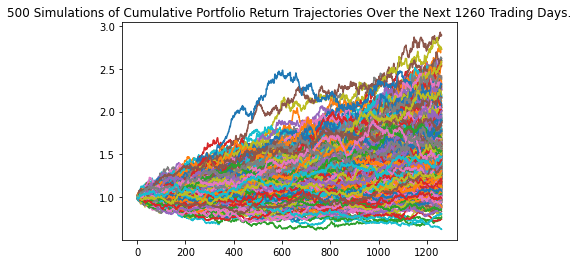

In [60]:
# Plot simulation outcomes
monte_carlo_5_year_plot = monte_carlo_5_year.plot_simulation()

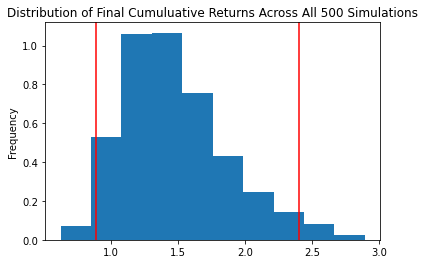

In [61]:
# Plot probability distribution and confidence intervals
monte_carlo_5_year_plot = monte_carlo_5_year.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
monte_carlo_5_year_results = monte_carlo_5_year.summarize_cumulative_return()

# Print summary statistics
print(monte_carlo_5_year_results)

count           500.000000
mean              1.475287
std               0.395204
min               0.623738
25%               1.187693
50%               1.437269
75%               1.669490
max               2.893686
95% CI Lower      0.885965
95% CI Upper      2.405606
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment = 90000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(monte_carlo_5_year_results[8]*initial_investment,2)
ci_upper_five = round(monte_carlo_5_year_results[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 5 years will end within in the range of $79736.83 and $216504.5


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_train_years = 10
monte_carlo_sims = 500

monte_carlo_ten_year_retire = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = monte_carlo_sims,
    num_trading_days = 252 * monte_carlo_train_years 
)

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_ten_year_retire.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997171,1.001104,0.994880,0.998149,1.003370,1.009304,1.000423,0.983913,1.001723,1.000809,...,0.983244,1.001600,1.009158,0.998265,1.011560,1.000004,0.999651,1.001653,0.992723,1.002807
2,1.005933,0.997734,0.995489,0.993145,1.010018,1.012359,1.007693,0.988838,1.007232,1.002954,...,0.994306,1.010012,1.018296,0.994548,1.009728,1.007610,1.001540,1.012773,0.998700,1.004356
3,1.009463,0.999758,0.992596,0.987531,1.003234,1.014356,1.002263,0.997001,1.011784,0.998634,...,0.983092,1.003213,1.005892,0.979735,0.991546,1.020185,1.000784,1.002777,0.996565,1.005211
4,1.001417,1.005583,0.992426,0.991006,1.003562,1.002595,0.994154,0.998438,1.012986,0.998582,...,0.993336,0.993826,1.008773,0.983171,0.982526,1.029835,1.012555,0.998717,0.995039,0.991734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.316864,3.386323,2.732959,2.330610,1.552835,4.273358,2.510402,1.648151,1.885419,2.233899,...,3.242344,1.907937,1.714398,1.439134,1.452559,3.438066,2.240808,2.435923,2.717526,1.982263
2517,2.317485,3.353217,2.735327,2.336046,1.567155,4.283864,2.509049,1.663631,1.892372,2.245896,...,3.268849,1.879158,1.712236,1.453154,1.445309,3.399012,2.261171,2.438352,2.729232,1.980063
2518,2.304769,3.353899,2.732769,2.344241,1.567854,4.315831,2.492347,1.644287,1.882916,2.255041,...,3.279413,1.867657,1.706125,1.471268,1.445119,3.444175,2.271981,2.444782,2.743952,1.965860
2519,2.265174,3.385344,2.684513,2.312145,1.548397,4.312944,2.500582,1.661002,1.864196,2.284809,...,3.293073,1.843152,1.680027,1.479692,1.440453,3.493730,2.278467,2.442330,2.714873,1.966576


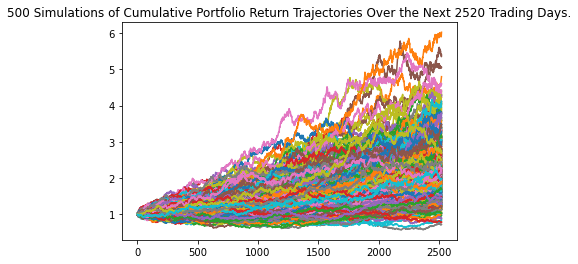

In [67]:
# Plot simulation outcomes
monte_carlo_ten_year_retire_plot = monte_carlo_ten_year_retire.plot_simulation()

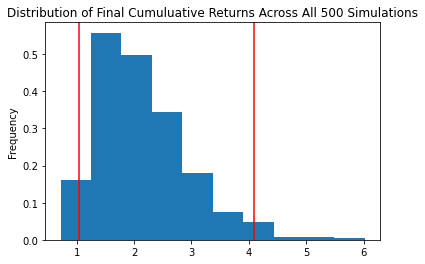

In [68]:
# Plot probability distribution and confidence intervals
monte_carlo_ten_year_retire_plot = monte_carlo_ten_year_retire.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
monte_carlo_retire_results = monte_carlo_ten_year_retire.summarize_cumulative_return()

# Print summary statistics
monte_carlo_retire_results

count           500.000000
mean              2.152266
std               0.795120
min               0.717316
25%               1.601746
50%               1.979970
75%               2.592679
max               6.023884
95% CI Lower      1.036189
95% CI Upper      4.084002
Name: 2520, dtype: float64

In [70]:
# Set initial investment
initial_investment = 11396
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(monte_carlo_retire_results[8]*initial_investment,2)
ci_lower_ten = round(monte_carlo_retire_results[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $11396 in the portfolio over the next 10 years will end within in the range of $46541.28 and $11808.41
